# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# set up lists to hold reponse info
city = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
num = 0

# Loop through the list of cities and perform a request for data on each
for c in cities:
    try:
        response = requests.get(query_url + c).json()
        
        #appending to each defined list.
        city.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed']) 
        
        num += 1
        print(f"Processing Record {num} | {c}")
        
    #Some cities may not have all the data required for this assignment.
    #Defining a keyError exception skips cities with missing data to append
    except KeyError:
        print('City not found. Skipping...')

print('-----------------------------\nData Retrieval Complete\n-----------------------------')
    

Processing Record 1 | tiksi
Processing Record 2 | soddy-daisy
Processing Record 3 | huilong
City not found. Skipping...
Processing Record 4 | bredasdorp
Processing Record 5 | mar del plata
Processing Record 6 | jamestown
Processing Record 7 | nador
Processing Record 8 | punta arenas
Processing Record 9 | ushuaia
Processing Record 10 | hobart
Processing Record 11 | lorengau
Processing Record 12 | sioux lookout
Processing Record 13 | oga
Processing Record 14 | severomuysk
Processing Record 15 | qaanaaq
Processing Record 16 | airai
Processing Record 17 | port macquarie
Processing Record 18 | thessalon
Processing Record 19 | dambulla
Processing Record 20 | kavaratti
Processing Record 21 | kahului
Processing Record 22 | vila franca do campo
Processing Record 23 | ribeira grande
Processing Record 24 | arraial do cabo
Processing Record 25 | georgetown
Processing Record 26 | upernavik
Processing Record 27 | dikson
Processing Record 28 | new norfolk
Processing Record 29 | shimoda
Processing Rec

Processing Record 232 | namibe
Processing Record 233 | dunedin
Processing Record 234 | kaeo
Processing Record 235 | hohhot
Processing Record 236 | portland
Processing Record 237 | san juan
City not found. Skipping...
Processing Record 238 | chifeng
Processing Record 239 | zonguldak
Processing Record 240 | kemin
Processing Record 241 | hobyo
Processing Record 242 | ponta do sol
Processing Record 243 | sigli
City not found. Skipping...
Processing Record 244 | tautira
Processing Record 245 | hasaki
Processing Record 246 | berezovyy
Processing Record 247 | rassvet
Processing Record 248 | semey
Processing Record 249 | rize
City not found. Skipping...
Processing Record 250 | kurilsk
Processing Record 251 | marawi
Processing Record 252 | batavia
Processing Record 253 | lata
Processing Record 254 | qasigiannguit
Processing Record 255 | galveston
Processing Record 256 | mabaruma
Processing Record 257 | svetlogorsk
Processing Record 258 | buraydah
Processing Record 259 | samarkand
Processing Rec

Processing Record 458 | cordoba
Processing Record 459 | igarka
Processing Record 460 | san jose
Processing Record 461 | whitianga
Processing Record 462 | vilhena
Processing Record 463 | werda
Processing Record 464 | praia
Processing Record 465 | tome
City not found. Skipping...
Processing Record 466 | turukhansk
Processing Record 467 | fairbanks
Processing Record 468 | gornyy
Processing Record 469 | axim
Processing Record 470 | aklavik
Processing Record 471 | the valley
Processing Record 472 | novo aripuana
Processing Record 473 | ola
Processing Record 474 | whitehorse
Processing Record 475 | puri
Processing Record 476 | isangel
Processing Record 477 | barra patuca
City not found. Skipping...
Processing Record 478 | hirna
Processing Record 479 | el rincon
Processing Record 480 | foumban
Processing Record 481 | manono
Processing Record 482 | aktau
Processing Record 483 | naranjal
Processing Record 484 | sangar
Processing Record 485 | sim
Processing Record 486 | saint-denis
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_dict = {
    'City':city,
    'Cloudiness':cloudiness,
    'County':country,
    'Data':date,
    'Humidity':humidity,
    'Lat':lat,
    'Lng':lng,
    'Max Temp':max_temp,
    'Wind Speed':wind_speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          570
Cloudiness    570
County        570
Data          570
Humidity      570
Lat           570
Lng           570
Max Temp      570
Wind Speed    570
dtype: int64

In [8]:
weather_data.head()

,City,Cloudiness,County,Data,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Tiksi,20,RU,1573711176,98,71.64,128.87,-12.18,0.98
1,Soddy-Daisy,1,US,1573711176,100,35.24,-85.19,32.00,5.53
2,Huilong,54,CN,1573711177,57,31.15,106.50,63.03,4.03
3,Bredasdorp,37,ZA,1573711177,77,-34.53,20.04,62.60,4.70
4,Mar del Plata,43,AR,1573711177,40,-46.43,-67.52,59.88,15.95


In [9]:
#Export to a CSV file
weather_data.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

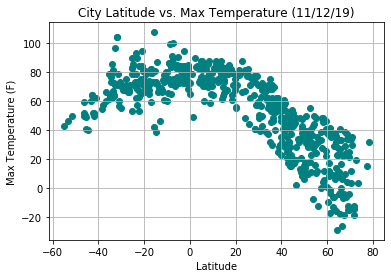

In [10]:
lat = weather_data['Lat']
maxTemp = weather_data["Max Temp"]

plt.scatter(lat, maxTemp, c="teal")
plt.title("City Latitude vs. Max Temperature (11/12/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid ()

plt.savefig("output_data/city_lat_vs_max_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

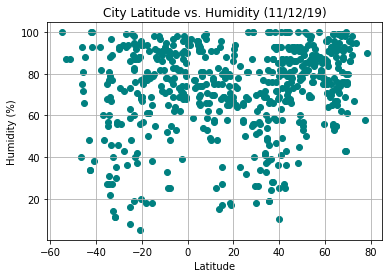

In [11]:
hum = weather_data["Humidity"]

plt.scatter(lat, hum, c="teal")
plt.title("City Latitude vs. Humidity (11/12/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid ()

plt.savefig("output_data/city_lat_vs_humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

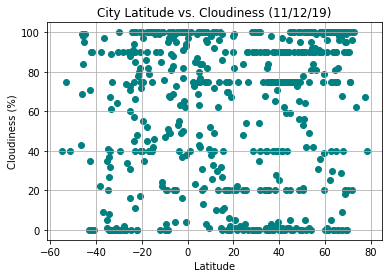

In [12]:
clo = weather_data["Cloudiness"]

plt.scatter(lat, clo, c="teal")
plt.title("City Latitude vs. Cloudiness (11/12/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid ()

plt.savefig("output_data/city_lat_vs_cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

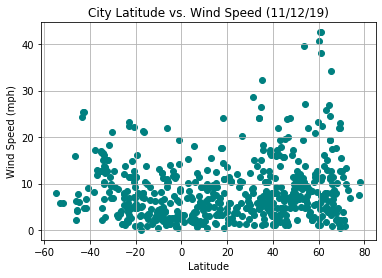

In [13]:
windSpeed = weather_data["Wind Speed"]

plt.scatter(lat, windSpeed, c="teal")
plt.title("City Latitude vs. Wind Speed (11/12/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid ()

plt.savefig("output_data/city_lat_vs_wind_speed.png")
plt.show()